# **42577 - Introduction to Business Analytics**
**Author:** *Chao Yu(s200079), Maria Konstantina Papaioannou(s195550), Shubham Ingole(s200092), Prasad Jagtap(s200109)*

Note - **For better performance, please use Google colab to browse**




# Exploratory Analysis

# **Contents**

> Proposed Challenge - **Impact of COVID-19**
* Introduction & problem statement
* Preliminary data wrangling, cleaning, descriptive statistics
* Challenge
* * Severe Global impact of COVID-19
* * Time Series Analysis across the horizon
* * Worst hit Countries & Territories
* * Risk Factor 
* * Population statistics and measures
* * Socio-economic factors vs total cases cases per million
* * Environmental factors vs total cases per million
* * Global Spread 
* Conclusion & reflection
* Project Contribution


## Problem statement - **Impact of COVID-19**

For the challenge part of the respective project, our take towards the project was something ambitious, and wanted to do something that could be easily viewable or noticeable. Later, we decided to showcase some relevant topics around **COVID-19** data. As a result, it felt very topical being that it is the subject of the time and pretty much the only thing on all of the minds. It was imperative to offer something unique to the World that nobody seemed to be doing. Even-though, there is a lot of real-time data analysis and visualizations available already. Our take at the below part with rare findings below, explains in deep about the distinct factors behind the current state of COVID-19 al around the globe.

We tend to start with the ***Global Impact*** later showcasing ***risk*** factor, ***socio-economic*** factors and ***environmental*** factor in general.


In [ ]:
#import required packages

import io
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
#import pycountry_convert as pc
from sklearn.cross_decomposition import PLSRegression
from sklearn import decomposition
import folium
import plotly.graph_objects as go
import seaborn as sns
import itertools
from scipy import stats
import plotly.express as px
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

## **Preliminary data wrangling, cleaning, descriptive statistics**

> In the data preparation for exploratory part, we have considered the similar steps that we have performed for the prediction of $CO_2$ Emission as in above section.

#### Data cleaning & preparation for ***Socio-economic & Environmental factors***

In [ ]:
df_covid = pd.read_csv('/content/covid.csv') #https://raw.githubusercontent.com/prasad-jagtap/Impact-of-COVID-19/main/covid.csv
df_cities = pd.read_csv('/content/cities_new.csv') #https://raw.githubusercontent.com/prasad-jagtap/Impact-of-COVID-19/main/cities_new.csv
df_covid1= df_covid[df_covid.date == '2020-04-30'][:-2]
df_covid2 = df_covid[df_covid.date == '2020-10-30'][:-2]

In [ ]:
df_covid1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
121,AFG,Asia,Afghanistan,2020-04-30,1949.0,122.0,110.429,60.0,0.0,2.857,50.066,3.134,2.837,1.541,0.000,0.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
366,ALB,Europe,Albania,2020-04-30,766.0,16.0,18.857,31.0,1.0,0.571,266.176,5.560,6.553,10.772,0.347,0.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.81,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
680,DZA,Africa,Algeria,2020-04-30,3848.0,199.0,134.000,444.0,7.0,6.000,87.752,4.538,3.056,10.125,0.160,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.85,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
926,AND,Europe,Andorra,2020-04-30,743.0,0.0,2.857,42.0,1.0,0.714,9616.256,0.000,36.978,543.584,12.942,9.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1158,AGO,Africa,Angola,2020-04-30,27.0,0.0,0.429,2.0,0.0,0.000,0.822,0.000,0.013,0.061,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.70,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581


> Per below, it can be seen that few of the columns from the COVID file are selected as desired features. 
Features to be used further are `Country`, `GDP_per_Capita`, `Life_Expectancy`, `CO2_Emissions_per_Capita`, `Congestion_Factor`, `Population_Factor`, `Development_Factor`, `Sustainability_Factor`, `Urbanization_Rate_Change_2015_–_2025` 

In [ ]:
features_to_use = ['Country','GDP_per_Capita','Life_Expectancy','CO2_Emissions_per_Capita','Congestion_Factor','Population_Factor','Development_Factor','Sustainability_Factor','Urbanization_Rate_Change_2015_–_2025']
df_cities_new = df_cities[features_to_use]
df_country = df_cities_new.groupby('Country').mean()
df_country['location'] = df_country.index
df_country.reset_index(inplace = True,drop =True)
df_country.head()

,GDP_per_Capita,Life_Expectancy,CO2_Emissions_per_Capita,Congestion_Factor,Population_Factor,Development_Factor,Sustainability_Factor,Urbanization_Rate_Change_2015_–_2025,location
0,617.9,60.5,0.693183,0.707286,0.310268,0.029561,0.221471,4.7,Afghanistan
1,4827.7,75.6,3.514780,0.605535,0.143812,0.175163,0.328134,4.9,Algeria
2,5175.8,52.4,1.384496,0.664884,0.317930,0.264522,0.259513,7.2,Angola
3,23030.0,76.4,4.462298,0.551491,0.145884,0.444910,0.317957,1.2,Argentina
4,3932.6,74.8,1.837059,0.553412,0.031009,0.266932,0.428654,-0.1,Armenia


> Evaluating the percentage of **NaN** values from the `COVID` dataset just to make sure we have refined data to process further.

In [ ]:
df_covid_country1 = pd.merge(df_country,df_covid1,on = ['location'])
df_covid_country2 = pd.merge(df_country,df_covid2,on = ['location'])
df_covid_country_num1 = 100* df_covid_country1.isna().sum()/df_covid_country1.shape[0]
df_covid_country_num2 = 100* df_covid_country2.isna().sum()/df_covid_country2.shape[0]
df_covid_country_num1

GDP_per_Capita                            0.000000
Life_Expectancy                           0.000000
CO2_Emissions_per_Capita                  0.000000
Congestion_Factor                         0.000000
Population_Factor                         0.000000
Development_Factor                        0.000000
Sustainability_Factor                     0.000000
Urbanization_Rate_Change_2015_–_2025      0.826446
location                                  0.000000
iso_code                                  0.000000
continent                                 0.000000
date                                      0.000000
total_cases                               0.826446
new_cases                                 0.826446
new_cases_smoothed                        0.826446
total_deaths                              9.090909
new_deaths                                0.826446
new_deaths_smoothed                       0.826446
total_cases_per_million                   0.826446
new_cases_per_million          

> It is observed that if certain columns has **more than a 50% NaN** values, model turns out to be non-descriptive and therefore, we are considering to discard the corresponding columns.

In [ ]:
features_to_drop1 = df_covid_country_num1[df_covid_country_num1.values >=50].index.values
features_to_drop2 = df_covid_country_num2[df_covid_country_num2.values >=50].index.values
features_to_drop1

array(['icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'], dtype=object)

> Above section refers to dropping the features/columns from the respective file and corresponding mean values are adjusted in for some invalid slots as mentioned in below code. 

In [ ]:
df_covid_country1.drop(features_to_drop1,axis = 1,inplace = True)
# df_covid_country1.fillna(df_covid_country1.mean(),inplace = True)
df_covid_country2.drop(features_to_drop2,axis = 1,inplace = True)
# df_covid_country2.fillna(df_covid_country2.mean(),inplace = True)

In [ ]:
df_covid_country1.head()

,GDP_per_Capita,Life_Expectancy,CO2_Emissions_per_Capita,Congestion_Factor,Population_Factor,Development_Factor,Sustainability_Factor,Urbanization_Rate_Change_2015_–_2025,location,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,617.9,60.5,0.693183,0.707286,0.310268,0.029561,0.221471,4.7,Afghanistan,AFG,Asia,2020-04-30,1949.0,122.0,110.429,60.0,0.0,2.857,50.066,3.134,2.837,1.541,0.000,0.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,4827.7,75.6,3.514780,0.605535,0.143812,0.175163,0.328134,4.9,Algeria,DZA,Africa,2020-04-30,3848.0,199.0,134.000,444.0,7.0,6.000,87.752,4.538,3.056,10.125,0.160,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.85,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.754
2,5175.8,52.4,1.384496,0.664884,0.317930,0.264522,0.259513,7.2,Angola,AGO,Africa,2020-04-30,27.0,0.0,0.429,2.0,0.0,0.000,0.822,0.000,0.013,0.061,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.70,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
3,23030.0,76.4,4.462298,0.551491,0.145884,0.444910,0.317957,1.2,Argentina,ARG,South America,2020-04-30,4272.0,158.0,142.286,214.0,7.0,7.857,94.522,3.496,3.148,4.735,0.155,0.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.89,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.825
4,3932.6,74.8,1.837059,0.553412,0.031009,0.266932,0.428654,-0.1,Armenia,ARM,Asia,2020-04-30,2066.0,134.0,77.571,32.0,2.0,1.143,697.211,45.221,26.178,10.799,0.675,0.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.755


In [ ]:
### country datasets with coordinates
df_coordinates = pd.read_csv('/content/countries.csv') #https://raw.githubusercontent.com/prasad-jagtap/Impact-of-COVID-19/main/countries.csv
df_coordinates.head()


,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [ ]:
### round latitude
def custom_round(x, base=5):
    if x<=90:
        return int(base * round(float(x)/base))

In [ ]:
df_coordinates['latitude'] = df_coordinates['latitude'].apply(lambda row:custom_round(row,base = 5))
df_coordinates = df_coordinates.rename(columns = {'name':'location'})
df_covid_country1 = pd.merge(df_covid_country1,df_coordinates,on = ['location'])
df_covid_country2 = pd.merge(df_covid_country2,df_coordinates,on = ['location'])
# df_covid = df_covid[~(df_covid.longitude.isnull()) & ~(df_covid.total_deaths_per_million.isnull())]

#### Data cleaning & preparation for ***Global Impact***

> The corresponding source for the datasets used further below can be found right from the [Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) repositiory, which is supposed to be updated every single day and get us a run time evaluations and assess the plots with the most updated and legitimate data.


In [ ]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

Proper data preparation allows for efficient analysis - it helps eliminate errors and inaccuracies that could have occurred during the data gathering process and can therefore help in removing some bias resulting from poor data quality. Loading data, cleaning data (removing unnecessary data), transforming data formats, and re-arranging data are the various steps involved in the data preparation step.

> The corresponding available and raw data had the initials of column in the upper case, the below section helps us rename the column names in lowercase. 

In [ ]:
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

> Record columns from the files are supposed to be in a uniformity, the below section is used to convert the column name of few of the existing columns to another for further convenience.

In [ ]:
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
country_df.head()

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
0,Afghanistan,2020-12-06 14:28:23,33.93911,67.709953,47306.0,1874.0,37685.0,7747.0,121.520719,NaN,NaN,3.961443,4,AFG
1,Albania,2020-12-06 14:28:23,41.15330,20.168300,42148.0,889.0,21286.0,19973.0,1464.591007,NaN,NaN,2.109234,8,ALB
2,Algeria,2020-12-06 14:28:23,28.03390,1.659600,87502.0,2501.0,56617.0,28384.0,199.543714,NaN,NaN,2.858220,12,DZA
3,Andorra,2020-12-06 14:28:23,42.50630,1.521800,7005.0,78.0,6171.0,756.0,9066.200738,NaN,NaN,1.113490,20,AND
4,Angola,2020-12-06 14:28:23,-11.20270,17.873900,15536.0,354.0,8335.0,6847.0,47.270350,NaN,NaN,2.278579,24,AGO


> Furthermore, the irrelevant NaN values are supposed to be cleaned and dropped for the global plot. The below piece of code is used to drop certain NaN values from columns `lat` & `long`.

In [ ]:
confirmed_df = confirmed_df.dropna(subset=['lat', 'long'])

> It is supposed that the files are prepared to be browsed as displayed below in sequence for `confirmed`, `death` and `recovered` cases.

> Below section represents the `confirmed`, `death`, `recovered`, `mortality_rate` and `active` cases for few countries. The respective classified sub-sections are further highlighted using the different set of colors in order to obtain certain uniformity throughout the particular sections of the exploratory part in the *Global Impact* sub-section.

In [ ]:
# sorting the values by confirmed descending order
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    c = 'background-color: cyan'  
    r = 'background-color: pink'
    g = 'background-color: lightgreen'
    y = 'background-color: yellow'
    o = 'background-color: orange'

    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = c
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    df1.iloc[:, 7] = y
    df1.iloc[:, 11] = o    
    return df1

def latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(latest_cases, n='5') #variable

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='5', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

> It can be noticed that the above table is interactive in accordance to the number of countries, willing to be showcased once changed the variable, maintaining the sequence of the countries with highest number of confirmed cases.

In [ ]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

#### Data cleaning and Preparation for Risk factor

> As we were looking into the impact of COVID globally, we wanted to check the role of gender in this pandemic and accordingly, indentify who is at the higher risk. The following dataset is refered from [Global Health 5050](https://globalhealth5050.org/). The following dataset is static as it was last updated by 30 November.

In [ ]:
df_risk = pd.read_csv('/content/Dataset.csv') #https://raw.githubusercontent.com/prasad-jagtap/Impact-of-COVID-19/main/Dataset.csv
df_risk.head(2)

,Country code,Country,Case & death data by sex?,Cases date,Cases where sex-disaggregated data is available,Cases male,Cases female,Deaths date,Deaths where sex-disaggregated data is available,Deaths male,Deaths female,Deaths in confirmed cases date,Proportion of deaths in confirmed cases male,Proportion of deaths in confirmed cases female,Proportion of deaths in confirmed cases Male:female ratio,Source
0,AF,Afghanistan,Yes,11/24/2020,43352.0,68.88%,31.12%,11/24/2020,1484.0,74.60%,25.40%,11/24/2020,3.71%,2.79%,1.33,http://covid.moph-dw.org/#/
1,AL,Albania,Yes,11/23/2020,33556.0,48%,52%,11/23/2020,716.0,67%,33%,11/23/2020,2.98%,1.35%,2.20,https://coronavirus.al/statistika/


> Initally the above dataset available data is on `confirmed cases` and `deaths` across the countries currently, including proportion of `deaths` in `confimed cases` for **gender**. Several data cleaning and preparation step has been taken in order to look into the further analysis. 

> Here, the column has longer name and for futher convenience the column name is renamed and the space has been removed. 

In [ ]:
def rename(name):
    name_split = name.split('(')
    return name_split[0].strip(" ").replace(" ", "_")
df_risk.rename(columns = rename,inplace = True)

> There were several irrelevant values in each row and needs to be removed for the plots. Below, `NaN` values are droped from each columns.

In [ ]:
df_filtered = df_risk.dropna(subset=['Country_code','Country','Cases_male', 'Cases_female', 'Deaths_male', 'Deaths_female', 'Cases_date', 'Deaths_date', 'Proportion_of_deaths_in_confirmed_cases_male', 'Proportion_of_deaths_in_confirmed_cases_female', 'Proportion_of_deaths_in_confirmed_cases_Male:female_ratio' ])

> The dataset contains values for proportion of `confirm cases` and `deaths` for `male` and `female` in percentage, and hence below it is restructured in order to use for mapping the data. 

In [ ]:
df_filtered['Cases_male'] = df_filtered['Cases_male'].apply(lambda row: float(row.strip('%'))/100)
df_filtered['Cases_female'] = df_filtered['Cases_female'].apply(lambda row: float(row.strip('%'))/100)
df_filtered['Deaths_male'] = df_filtered['Deaths_male'].apply(lambda row: float(row.strip('%'))/100)
df_filtered['Deaths_female'] = df_filtered['Deaths_female'].apply(lambda row: float(row.strip('%'))/100)
df_filtered['Proportion_of_deaths_in_confirmed_cases_male'] = df_filtered['Proportion_of_deaths_in_confirmed_cases_male'].apply(lambda row: float(row.strip('%'))/100)
df_filtered['Proportion_of_deaths_in_confirmed_cases_female'] = df_filtered['Proportion_of_deaths_in_confirmed_cases_female'].apply(lambda row: float(row.strip('%'))/100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
df_filtered.head(2)

,Country_code,Country,Case_&_death_data_by_sex?,Cases_date,Cases_where_sex-disaggregated_data_is_available,Cases_male,Cases_female,Deaths_date,Deaths_where_sex-disaggregated_data_is_available,Deaths_male,Deaths_female,Deaths_in_confirmed_cases_date,Proportion_of_deaths_in_confirmed_cases_male,Proportion_of_deaths_in_confirmed_cases_female,Proportion_of_deaths_in_confirmed_cases_Male:female_ratio,Source
0,AF,Afghanistan,Yes,11/24/2020,43352.0,0.6888,0.3112,11/24/2020,1484.0,0.746,0.254,11/24/2020,0.0371,0.0279,1.33,http://covid.moph-dw.org/#/
1,AL,Albania,Yes,11/23/2020,33556.0,0.4800,0.5200,11/23/2020,716.0,0.670,0.330,11/23/2020,0.0298,0.0135,2.20,https://coronavirus.al/statistika/


##### Data cleaning and preparation for USA

> As the pandemic has affected all the countries in the world, however, there are countries that were most affected by the COVID and since the world leaders are topping the chart even with the highest medical facilites. From our analysis we found that the **`USA`** is leading in all aspects of vulnarability, hence we were interested in looking into `gender` and different `age groups` that are most affected in USA. 

> The following Dataset is referred form [Centers Disease control and prevention, (National Center for Health Statistics)](https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku) which contains the recorded deaths by the officals from the country. 


In [ ]:
#importing dataset
df_usa = pd.read_csv('/content/COVID-19_Death_Counts_by_Sex__Age_USA.csv') #https://raw.githubusercontent.com/prasad-jagtap/Impact-of-COVID-19/main/COVID-19_Death_Counts_by_Sex__Age_USA.csv

In [ ]:
df_usa.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,12/02/2020,02/01/2020,11/28/2020,United States,All Sexes,All Ages,249570.0,2635214.0,249148.0,113943.0,6852.0,390588.0,NaN
1,12/02/2020,02/01/2020,11/28/2020,United States,All Sexes,Under 1 year,29.0,14843.0,139.0,4.0,15.0,179.0,NaN
2,12/02/2020,02/01/2020,11/28/2020,United States,All Sexes,0-17 years,127.0,26333.0,407.0,20.0,123.0,637.0,NaN
3,12/02/2020,02/01/2020,11/28/2020,United States,All Sexes,1-4 years,16.0,2768.0,91.0,2.0,42.0,147.0,NaN
4,12/02/2020,02/01/2020,11/28/2020,United States,All Sexes,5-14 years,44.0,4453.0,120.0,7.0,53.0,210.0,NaN


> Renaming the columns for futher convenience by removing spaces. 

In [ ]:
def rename(name):
    name_split = name.split('(')
    return name_split[0].strip(" ").replace(" ", "_")
df_usa.rename(columns = rename,inplace = True)

> Looking into the dataset, the column ```States and age_group``` has data for each `age group` according to different states. We wanted to see the cumulative deaths for each `age group` and gender for the whole country, in order to achive that we have grouped the male and sex for total deaths in united states. 





In [ ]:
usa_male = df_usa[df_usa['Sex'] == 'Male']
male_age_group = usa_male.groupby('Age_group')['Total_Deaths'].sum()
usa_female = df_usa[df_usa['Sex'] == 'Female']
female_age_group = usa_female.groupby('Age_group')['Total_Deaths'].sum()

In [ ]:
df_age_sex = pd.DataFrame({'age group':female_age_group.index,
                          'Female deaths':female_age_group.values,
                          'Male deaths':male_age_group.values})

> The `age group` that we got was not in the sequece as it is required for understanding. Below, it has be tailored and made the `age group` sequence as Index.

In [ ]:
age_group_sequence = ['Under 1 year', '1-4 years', '5-14 years', '15-24 years', '25-34 years', '35-44 years','45-54 years',
                                                    '55-64 years','65-74 years','75-84 years','85 years and over','All Ages','30-49 years','50-64 years']

df_age_sex.set_index('age group',inplace = True,drop = True)
df_age_sex = df_age_sex.reindex(age_group_sequence)
df_age_sex

,Female deaths,Male deaths
age group,,
Under 1 year,13274.0,16452.0
1-4 years,2231.0,3182.0
5-14 years,3490.0,5297.0
15-24 years,14914.0,42394.0
25-34 years,34202.0,82918.0
35-44 years,56573.0,108968.0
45-54 years,112241.0,189337.0
55-64 years,265572.0,425390.0
65-74 years,440964.0,610337.0


#### Correlation matrix for all  features

> To summarize the data and utilize the final data input for further analysis, we are plotting the correlation matrix as a heatmap. Here, in the plot below, we can see that some factors have stronger hue for few of the colors, meaning, there is a larger correlation magnitude, and the weaker hue of any color represents smaller correlation factor.

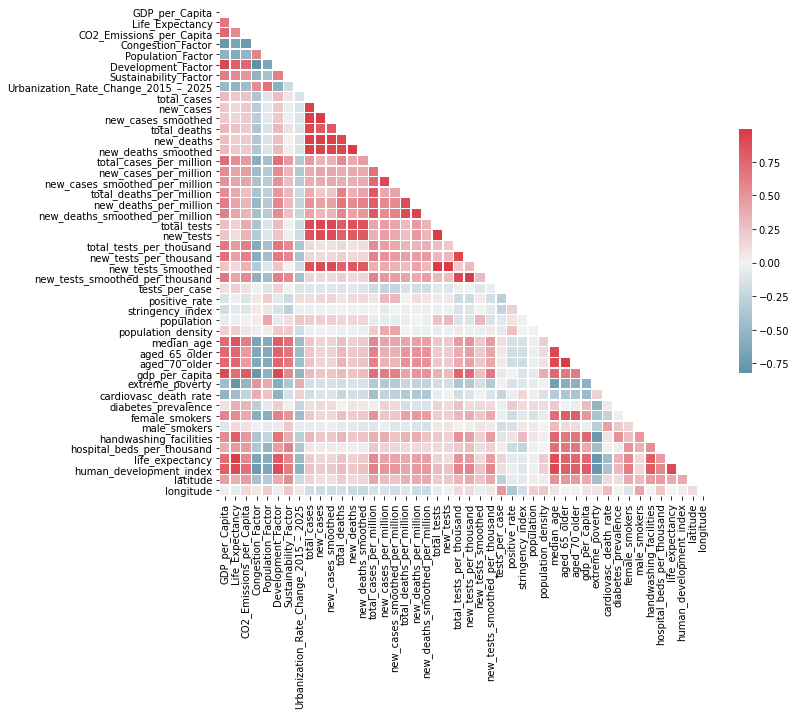

In [ ]:
corr = df_covid_country1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From the correlation plot, it can be seen that there are many highly correlated pairs (dark red and dark blue)

## **Challenge**

### *Severe Global impact of COVID-19*

> Below section covers the severe impact on the countries, arranged in a scatter plot, showcasing highly affected countries in the descending order.

In [ ]:
#plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" impacted countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    height=600,
    width=900
    )
    fig.show();

interact(bubble_chart, n=20)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=20, description='n', max=60, min=-20), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

> It can be noticed that an interactive button is available to fix a scale for number of countries, anyone wants to display between certain range. Apparently, it can be seen that the section is currently able to accommodate details for 20 countries in the above plot, however, the range of the value `n` is variable and can be reduced to as small as `1` or can be maximimzed to value `50` for insightful visualization.

### *Time Series Analysis across the horizon*

> The respective section helps to visualize the certainity in growth of `confirmed cases` & `deaths` throughout the time right from when the pandemic started to evolve. 

In [ ]:
def timeseries_per_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['cyan', 'pink']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID-19 cases of " + country,
        xaxis_title='Date (Weekly)',
        yaxis_title='Number of Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 900,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();


> The below section helps to interact with the function from the original piece of code to customize and add the country of the User's choice. In the case of default, the section displays the plot for whole `World` which can be further changed to the country of User's choice.

> Hovering the cursor over the respective graph helps user gets idea about the more detailed information, eg - count of `confirmed cases` or `deaths` for a particular day/week.

In [ ]:
interact(timeseries_per_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' 
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

### *Worst hit Countries & Territories*

> The analogy in the respective section revolves around the different sub-sections like `confirmed cases`, `deaths`, `recovered cases`, `active cases` and `mortality rate` for first 20 impacted countries around the globe.

> It is advisable to look at each individual plot for classified sub-section of the corresponding section. A pattern could be acknowledged at the end of the section for further analysis. 


#### Confirmed cases

In [ ]:
px.bar(
    sorted_country_df.head(20),
    x = "Countries",
    y = "Confirmed cases",
    title= "First 20 affected countries with highest confirm cases", 
    color_discrete_sequence=["cyan"], 
    height=600,
    width=900
)

> From the above plot, it can be easily derived that `US`, `India` and `Brazil` are among the countries which are highly affected due to COVID-19. The respective plot showcases the top 20 countries with large number of`confirmed cases` and implies that these are the countries which are supposed to work on the health regulations in order to bend the curve. 

#### Deaths

In [ ]:
px.bar(
    sorted_country_df.head(20),
    x = "Countries",
    y = "Confirmed deaths",
    title= "First 20 affected countries with highest confirm cases showcasing the volume of deaths", 
    color_discrete_sequence=["pink"], 
    height=600,
    width=900
)

> From the above plot, it can be said that `US`, `Brazil`, `India` and `Mexico`are highly impacted countries when it comes to `deaths`marching across `100k` count.

#### Recovered Cases

In [ ]:
px.bar(
    sorted_country_df.head(20),
    x = "Countries",
    y = "Recovered cases",
    title= "First 20 countries with highest confirm cases showcasing effective recovery rate", 
    color_discrete_sequence=["lightgreen"], 
    height=600,
    width=900
)

> The respective graph showcases the recovery rate for particular countries, however, it can be concluded that `India` has the highest `recovered cases` with figure approaching `9M` survivals when compared to any other country in the list of top 20 affected countries. Following `India`, `Brazil` with almost `6M` count also surprizingly has high volume of `recovered cases` later followed by `US` with approximate `5.5M` of count and other remaining countries with less count and even lesser impact.

#### Active Cases

In [ ]:
px.bar(
    sorted_country_df.head(20),
    x = "Countries",
    y = "Active cases",
    title= "Firt 20 impacted countries with highest confirm cases showcasing active patients",
    color_discrete_sequence=["yellow"], 
    height=600,
    width=900
)

> The corresponding plot refers to the `active cases` among the top 20 countries with highest confirmed cases. However, it can be summarised that, `US` tends to peak the result with approximately `8.8M` for highest `active cases` as of latest, followed by `France`, `Spain`, `United Kingdom`, `Italy`, `Belgium` , `India` and `Brazil`. 

### Risk factor

> In the above analysis, we noticed the deomgraphics for the COVID pandemic, since we have been through several analysis where we looked into the `confirmed cases`, `deaths`, `recoveries` and `active cases` for different countries over the period. 

> We were interested in probing deeper into the aspects, identify the role of `gender` and understand how critical is this aspect for creating an appropriate and effective response in the COVID-19 outbreak. So, for the further analysis we looked into `confirm cases` and `deaths` for **`Male`** and **`female`** on the global scale. 

In [ ]:
def impact_gender(fcsv):
    
    #for cases
    
    fig=plt.figure(figsize=(15, 15))
    ax1=fig.add_subplot(221)
    avg_female = np.mean(df_filtered['Cases_female'])
    avg_male = np.mean(df_filtered['Cases_male'])
    plt.title('Confirm cases by gender')
    plt.bar(['Female','Male'],[avg_female,avg_male])
    plt.xlabel("Gender")
    plt.ylabel("Confirm Cases")
    
    #for deaths
    ax2=fig.add_subplot(222)
    avg_female = np.mean(df_filtered['Deaths_female'])
    avg_male = np.mean(df_filtered['Deaths_male'])
    plt.title('Deaths by gender')
    plt.bar(['Female','Male'],[avg_female,avg_male])
    plt.xlabel("Gender")
    plt.ylabel("Confirmed Deaths")

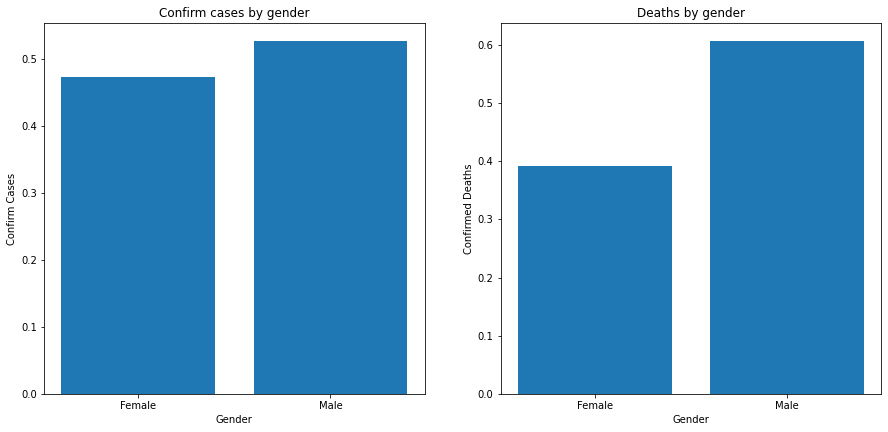

In [ ]:
impact_gender('Dataset.csv')

> The above plots shows the `Confirm cases` and `deaths` by ***`gender`*** for all the countries in average, it can been observed that the count of `confirmed cases` and `confirmed deaths` for **`male`** is dominant over the count of **`female`**. 

#### Population Statistics and Measures

> Residents living in places with high population density, such as countries with higher population, are more likely to be in direct contact with other people. Thus, any infectious illness can quickly spread in dense areas when compared to other. 

>The following graphs have been illustrated to see how the epidemic has spread through the countries based on the population. The section showcases scatter plot to represent various aspects in the **population statistics** for `total cases per million`. 

In [ ]:
# Plot formating
def plot_scales(ax1, time, data1, data2,ylabel1,ylabel2,day):
    ax2 = ax1.twinx()
    ax1.bar(time, data1, color='green', width = 2) 
    ax1.set_xlabel('latitude')
    ax1.set_ylabel(ylabel1)
    ax2.plot(time, data2,color = 'red',marker='.',linewidth = 1)
    ax2.set_ylabel(ylabel2)
    ax2.grid(None)

    plt.title(day)
    return ax1, ax2

#### Population density for total number of cases per million

> The main objective is to look for total number of `confirmed cases per million` in different density area, since to tailor the analyis for all the nations, we have mapped based on the latitude. In below graph, the *bar* shows the **population density** and the *line* marker represents the `total cases per million`.

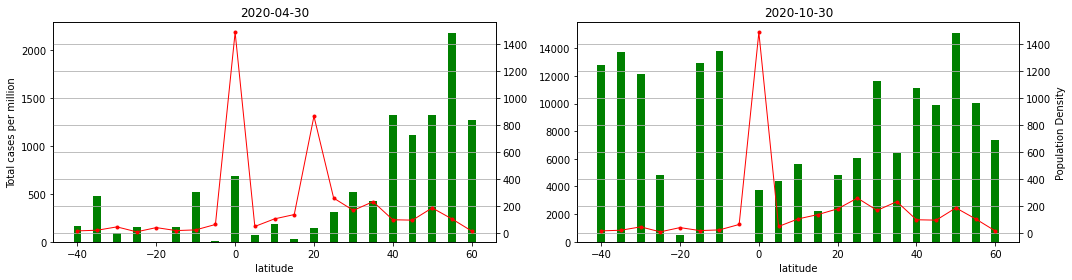

In [ ]:
df_latitude1 = df_covid_country1.groupby('latitude')['total_cases_per_million'].mean()
df_latitude2 = df_covid_country2.groupby('latitude')['total_cases_per_million'].mean()

population1 = df_covid_country1.groupby('latitude')['population_density'].mean()
population2 = df_covid_country2.groupby('latitude')['population_density'].mean()


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = plot_scales(ax1,df_latitude1.index,df_latitude1.values,population1.values,'Total cases per million','','2020-04-30')
ax2, ax2a = plot_scales(ax2,df_latitude2.index, df_latitude2.values, population2.values,'','Population Density','2020-10-30')

plt.tight_layout()
plt.show()

> Looking at the plots, the distribution of `population density` and `total cases per million` turns out to be different than our expectation. Here, it shows that densely-populated areas have a **lower value** of `total cases per million`. However, the virus can be spread faster within a densed area. The concentrated area is around the equator, where the temperature is high all the year. According to the researchers of infectious disease, high temperature can slow down the spread of the virus.

#### New confirm cases vs availability of beds in hospitals

> From the recorded data source it is observed that the new cases have been registered i.e the so-called second wave has it most of the countries and territories. Based on the available pandemic evidence, there is an absence of any precise medicine for the treatment of the virus or any effective vaccine to prevent it.
 
>As the number of cases has been growing rapidly, the requirement of the hospital beds are also in high demand. However, it is difficult to provide facilities at larger extent. Here, we looked into new registered cases and the availability of the hospital bed.

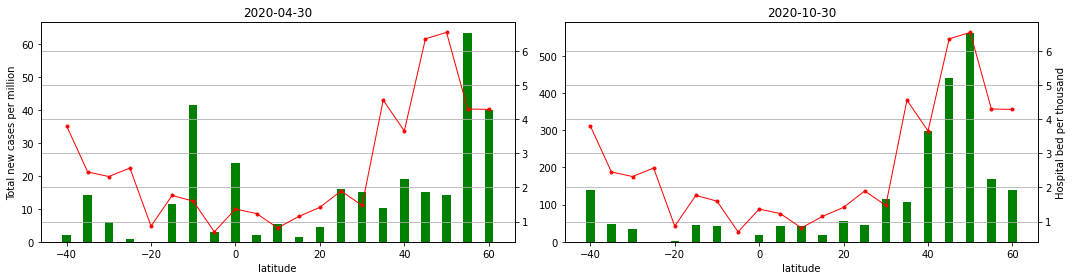

In [ ]:
new_cases1 = df_covid_country1.groupby('latitude')['new_cases_per_million'].mean()
new_cases2 = df_covid_country2.groupby('latitude')['new_cases_per_million'].mean()

hospital_bed1 = df_covid_country1.groupby('latitude')['hospital_beds_per_thousand'].mean()
hospital_bed2 = df_covid_country2.groupby('latitude')['hospital_beds_per_thousand'].mean()


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = plot_scales(ax1,new_cases1.index,new_cases1.values,hospital_bed1.values,'Total new cases per million','','2020-04-30')
ax2, ax2a = plot_scales(ax2,new_cases2.index,new_cases2.values, hospital_bed2.values,'','Hospital bed per thousand','2020-10-30')

plt.tight_layout()
plt.show()

> The line measure shows the trend of the confirmed new registered case of COVID, where the bars shows the number of hospital beds, it can be seen that globally it was higher at the beginning of the outbreak and increased rapidly before recording a downfall of people getting affected, it is most likely due to the implementation of rules by every nation to control the outbreak. Since the dataset is in latest updated until the start of November, it has been steep growth in the spread of the virus. 

> As the northern part has been more efficient to tackle the outbreak. It states that the rise of spread is significant, and soon nations need to increase the supply for health facilities and/or accordingly conduct strict regulations to bend the curve. 

#### People age over 70 died vs total deaths per million

The risk of getting ill due to the virus increases with the age, and people who are above the age of 70 are more at risk. Hence, further analysis is made to take a look at the statistics for the older age group.

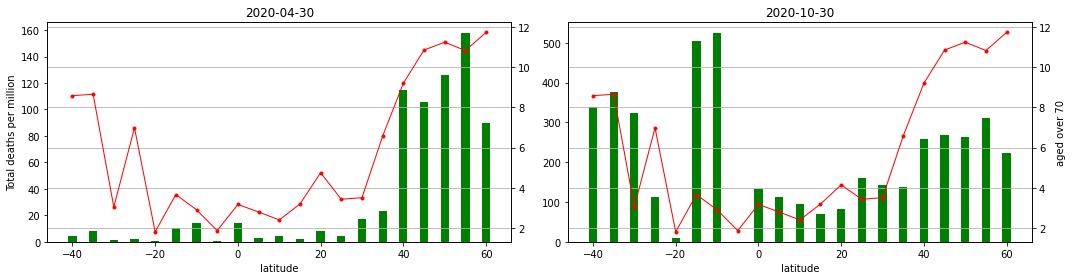

In [ ]:
death1 = df_covid_country1.groupby('latitude')['total_deaths_per_million'].mean()
death2 = df_covid_country2.groupby('latitude')['total_deaths_per_million'].mean()

population1 = df_covid_country1.groupby('latitude')['aged_70_older'].mean()
population2 = df_covid_country2.groupby('latitude')['aged_70_older'].mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = plot_scales(ax1,death1.index,death1.values,population1.values,'Total deaths per million','','2020-04-30')
ax2, ax2a = plot_scales(ax2,death2.index, death2.values, population2.values,'','aged over 70','2020-10-30')

plt.tight_layout()
plt.show()

> In general, the plot states that countries with higher percent of old population have more deaths per million, except countries are around -$15^{\circ}$ S (Peru).

#### Risk factor for USA

> Trends from the previous analyis considering  `Population staticts`, `confirmed cases`,  `deaths` `active cases` leads to a conclusion that ***`USA`*** being the worst hit country followed by `India` and `Brazil`. Since, ***`USA`*** is World leading according to the records in this pandemic, we wanted to scout the performance of COVID impacting different `age groups` for that matter as we seen in the above section that the older people are more vulnareable. 

>Hence, we were keen to find the mortality in the heavily affected country by the age and gender. The following analysis illustrates the overall incidence rate of Coronavirus in the United States of America. 

In [ ]:
def impact_usa(fcsv):    
    plt.style.use('ggplot')                     
    ax = df_age_sex[:-2].plot.bar(legend=True)
    plt.title('Overall incidence rate of COVID-19 in the United States')
    plt.xlabel("Age group")
    plt.ylabel("Deaths Cases")

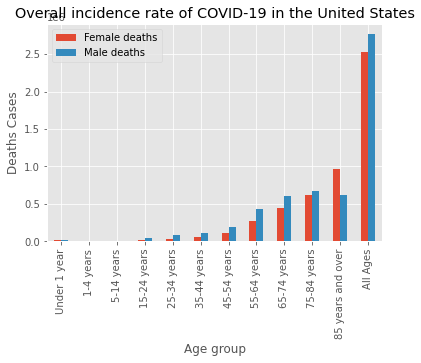

In [ ]:
impact_usa('USA.csv')

> Looking at the above graph, it can be concluded that the `age group` above `50` are at the **higher risk** of getting affected. Whereas, `teenagers` and `infants` are less likely to be at risk due to the high immunity at the *younger age*. In contrast, the people with the `age group` above `65` are highly endangered and are more likely to get affected. In a hindsight, `men` has more ratio of `deaths` than on the count on `female`, as the records are very similar to the global trend.


#### **Reflection**
> The population density doesn't determine amount of cases per million in a country, while it is evident that higher percent of old population can get highly impacted in high death-rate.

### *Socio-econominc factors* 

> The COVID-19 epidemic is more than just a medical condition, as it impacts not just societies but also economies at their roots. However, the effects of the pandemic will vary from countries and cities. In this section, we wanted to analyze the impact of COVID in regards to the several **socio-economic** factors for the `total number of cases per million`. We know that until there will be an immediate solution, in the coming years, everybody is likely to suffer more by putting health at risk. It will be interesting to see the impact of the pandemic and therefore, a scatter plot is leveraged to showcase different factors.  






##### GDP vs Total cases per million

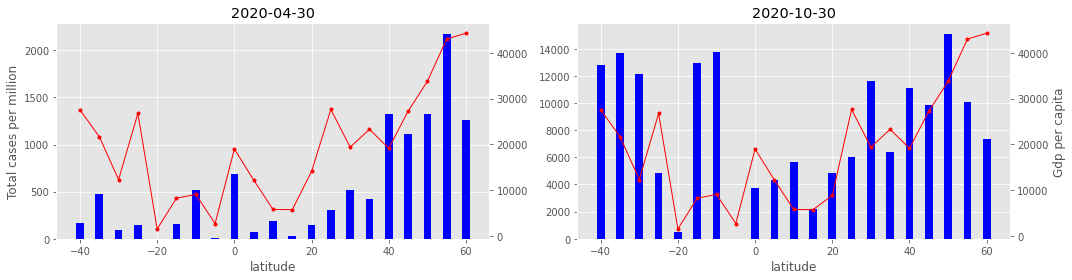

In [ ]:
gdp1 = df_covid_country1.groupby('latitude')['gdp_per_capita'].mean()
gdp2 = df_covid_country2.groupby('latitude')['gdp_per_capita'].mean()


def two_scales(ax1, time, data1, data2,ylabel1,ylabel2,day):
    ax2 = ax1.twinx()
    ax1.bar(time, data1, color ='blue', width = 2)
    ax1.set_xlabel('latitude')
    ax1.set_ylabel(ylabel1)
    ax2.plot(time, data2,color = 'red',marker='.',linewidth = 1)
    ax2.set_ylabel(ylabel2)
    ax2.grid(None)

    plt.title(day)
    return ax1, ax2

# Create some mock data

# Create axes
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = two_scales(ax1,df_latitude1.index,df_latitude1.values,gdp1.values,'Total cases per million','','2020-04-30')
ax2, ax2a = two_scales(ax2,df_latitude2.index, df_latitude2.values, gdp2.values,'','Gdp per capita','2020-10-30')

plt.tight_layout()
plt.show()



From the two charts above, it can be seen that most of the cases were aggregated in the **high GDP area**, with latitude from 30N to 60N in the beginning. However, high GDP area still had many cases and the cases in the medium gdp area surged. Furthermore, some **low GDP area** is still kept lower cases per million ratio, especially area around the equator.

##### Extreme Poverty vs Total cases per million

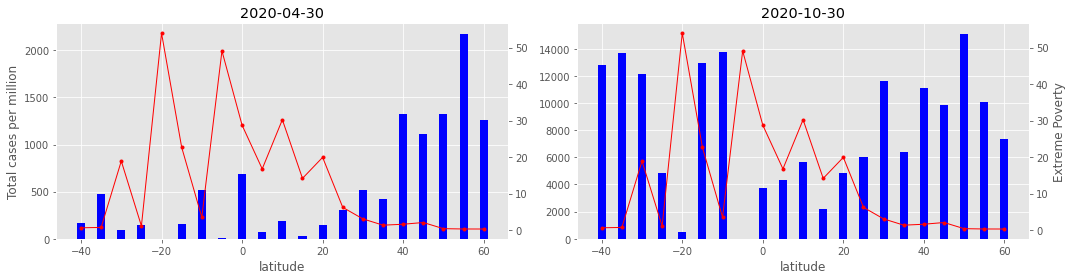

In [ ]:
poverty1 = df_covid_country1.groupby('latitude')['extreme_poverty'].mean()
poverty2 = df_covid_country2.groupby('latitude')['extreme_poverty'].mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = two_scales(ax1,df_latitude1.index,df_latitude1.values,poverty1.values,'Total cases per million','','2020-04-30')
ax2, ax2a = two_scales(ax2,df_latitude2.index,df_latitude2.values,poverty2.values,'','Extreme Poverty','2020-10-30')

plt.tight_layout()
plt.show()


It is interesting that some area with **high extreme-poverty** have **lower cases per million**, corresponding to the area around the equator as, in the previous part.

##### Human development index vs Total cases per million

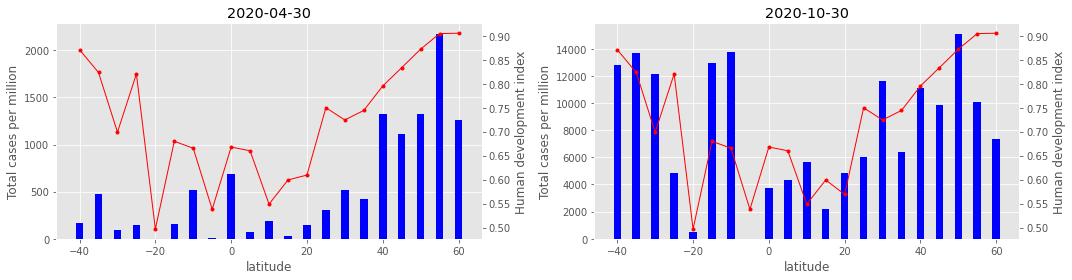

In [ ]:
human1 = df_covid_country1.groupby('latitude')['human_development_index'].mean()
human2 = df_covid_country2.groupby('latitude')['human_development_index'].mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = two_scales(ax1,df_latitude1.index,df_latitude1.values,human1.values,'Total cases per million','Human development index','2020-04-30')
ax2, ax2a = two_scales(ax2,df_latitude2.index,df_latitude2.values,human2.values,'Total cases per million','Human development index','2020-10-30')

plt.tight_layout()
plt.show()

In the Northen Hemisphere, the value of human development index increases as latitude grows. The value of `total cases per million` always  stays in a **higher position**. While in the Southern Hemisphere, areas from 0 to 20S have relative **lower values** of human development index. It is obvious that cases in the countries around 20S,which have medium human development index, increased drastically in the past six months.

#### Life Expectancy vs Total Cases per million

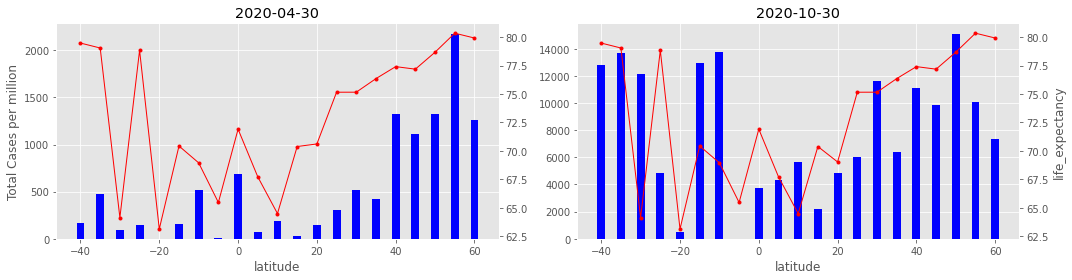

In [ ]:
life_exp1 = df_covid_country1.groupby('latitude')['life_expectancy'].mean()
life_exp2 = df_covid_country2.groupby('latitude')['life_expectancy'].mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = two_scales(ax1,df_latitude1.index,df_latitude1.values, life_exp1.values,'Total Cases per million','','2020-04-30')
ax2, ax2a = two_scales(ax2,df_latitude2.index,df_latitude2.values, life_exp2.values,'','life Expectancy','2020-10-30')

plt.tight_layout()
plt.show()

From the above two plots, it could be visualized that most of the cases until the end of April barely had healthy `life expectancy`, to be precise from latitude 40N to 60N that too in the range of `70` to `80`. However, in the past six months, if the data is recalled, it can be observed that the `life expectancy` seems to be healthy all around the Globe by people maintaining their health, taking precautions, following protocol and develop a healthy life-cycle.

#### Total tests per thousand vs Total cases per million

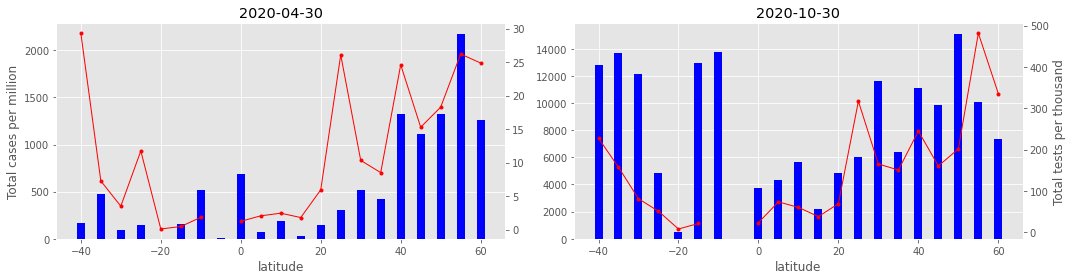

In [ ]:
test1 = df_covid_country1.groupby('latitude')['total_tests_per_thousand'].mean()
test2 = df_covid_country2.groupby('latitude')['total_tests_per_thousand'].mean()


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = two_scales(ax1,df_latitude1.index,df_latitude1.values,test1.values,'Total cases per million','','2020-04-30')
ax2, ax2a = two_scales(ax2,df_latitude2.index, df_latitude2.values, test2.values,'','Total tests per thousand','2020-10-30')

plt.tight_layout()
plt.show()

In the previous parts, the **socio-economic** factors were analyzed with `total cases per million`. It can be conclued that more developed countries have more cases per million. While according to the two charts above, those countries which have **high GDP per capita**, **low extreme-poverty** and **high human development index** did ***more tests per thousand than the others***. Thus, one of the reason is that developed countries conducted more tests per thousand.

#### **Reflection**

*It can be clearly seen that developed area have more cases because they contributed more into controlling the pandemic and did more tests. The lesser developed countries normally did fewer tests and some of the them still have many cases. Thus, it can be concluded that bending the curve of the pandemic depends on how the less developed area controls the situaton with virus.*

### *Environmental factor* 

> [JRC](https://ec.europa.eu/jrc/en/science-update/do-environmental-factors-influence-covid-19-outbreaks) scientists found that only in Europe at most 7% of deaths with confirmed COVID-19 virus are caused due to air quality impacts. Whereas, pollution can be an equal contributor to higher vulnerability. While the impact can be seen as very low in regards to the other factors. As we were analyzing the COVID globally, the following work attempts to evaluate the spread of COVID-19 in regards to **environmental aspects** such as `CO2_Emissions_per_Capita` for the `total_deaths_per_million` and `total_cases_per_million` in the scale of scatter plots.

##### $CO_2$ Emissions per Capita vs total Deaths per million

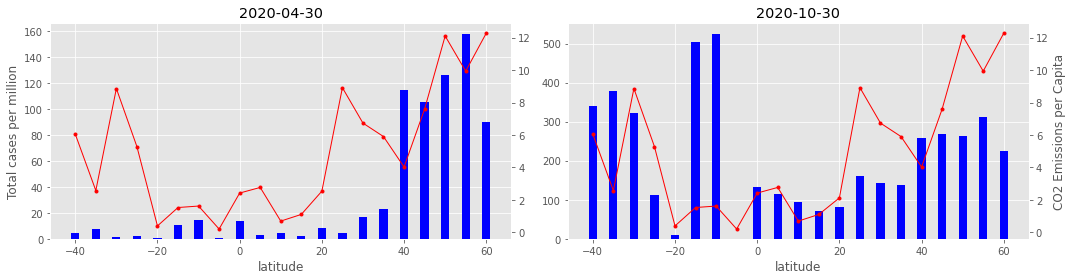

In [ ]:
population1 = df_covid_country1.groupby('latitude')['CO2_Emissions_per_Capita'].mean()
population2 = df_covid_country2.groupby('latitude')['CO2_Emissions_per_Capita'].mean()


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = two_scales(ax1,death1.index,death1.values,population1.values,'Total cases per million','','2020-04-30')
ax2, ax2a = two_scales(ax2,death2.index,death2.values, population2.values,'','CO2 Emissions per Capita','2020-10-30')

plt.tight_layout()
plt.show()

##### $CO_2$ Emissions per Capita vs total cases per million

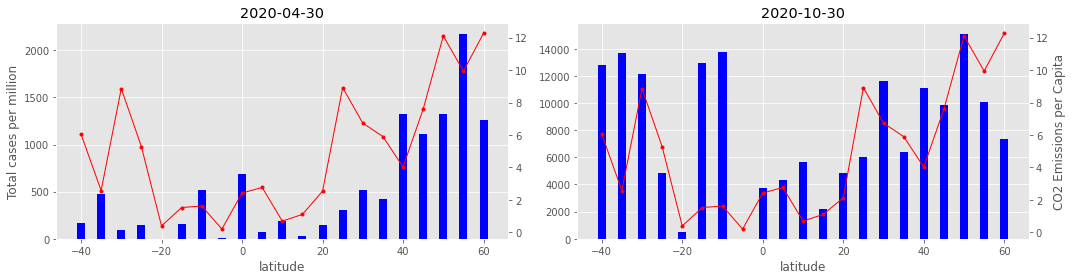

In [ ]:
total_cases1 = df_covid_country1.groupby('latitude')['total_cases_per_million'].mean()
total_cases2 = df_covid_country2.groupby('latitude')['total_cases_per_million'].mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1, ax1a = two_scales(ax1,total_cases1.index,total_cases1.values,population1.values,'Total cases per million','','2020-04-30')
ax2, ax2a = two_scales(ax2,total_cases2.index,total_cases2.values, population2.values,'','CO2 Emissions per Capita','2020-10-30')

plt.tight_layout()
plt.show()

It is a well stated fact that the exposure to air pollution might result in increase in the risk of diseases of the respiratory system, supporting the hypothesis, $CO_2$ is a major contributor to air pollution. it is interesting to see if there is any relation between `death per million`, `confirm cases per million` and `air pollution`. While from the charts above, it can be noticed that the environmental factor have little effect on the spread of the virus.

#### **Reflection**

*Due to the wide spread of the virus, $CO_{2}$ doesn't seem to have a strong impact on it. Every  group is easily-infectious to the virus, which makes it hard to see the environmental effects.*

### Global spread of COVID-19

> The below map shows the geographic expressions for each country around the horizon with significant data for `Confirmed cases`, `confirmed deaths`, and tries to showcase `death rate` for the respective countries.

In [ ]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)

for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='black',
        fill_color='grey',
        tooltip = "<div style='margin: 0; background-color: grey; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+  
                    "</ul></div>",
        ).add_to(world_map)

world_map

## **Conclusion**

This exploratory notebook provides data analysis of "***Impact of COVID-19***" on the World. This part covers several aspects of the data analysis as it showcases data preparation, data wrangling, and data cleaning for different datasets. Further, it also illustrates demographics for time series analysis, plots, geo-map, and regression models provided by the reflection for each part. The main objective of the report is to identify the **global impact** of the virus, how it has affected people in different **regions/territories**, different **ages**, and **gender**. In order to analyze the root cause of the epidemic, we analyzed several different factors such as **Socio-economic**, **Risk**, and **environmental factors** to understand how these factors are responsible for the spread and help us globally **flatten the curve** and lower the rate of infections by performing measures.

<img src = https://ufhealthjax.org/news/images/2560/lg1.jpg>

### **Reflection**

In order to understand the significance of each part of the above analysis, we had a brief discussion where we tried to map the outcome of the analysis with United Nations [Sustainable Development Goals](https://sdgs.un.org/goals) (SDGs).

It is evident enough to state that the outcome from the analysis certainly aims towards few of the SDGs adopted by United Nations.

<img src = https://www.globalpartnership.org/sites/default/files/uneca_300x300.jpg>

> **[SDG 1 (No poverty)](https://www.un.org/sustainabledevelopment/poverty/)** -  For the socio-economic factors, we did an analysis based on the existing records from the COVID dataset, where we analyzed the trend of poverty. It was an interesting finding that some regions/territories with high extreme-poverty ratio have **lower cases per million**, corresponding to the area around the equator. However, to support the poorest and most vulnerable, the UN has issued a [Framework for the immediate socio-economic response to COVID-19](https://www.un.org/sites/un2.un.org/files/un_framework_report_on_covid-19.pdf) calling for an extraordinary scale-up of international support and political commitment to ensure that people everywhere have access to essential services and social protection.   

> **[SDG 3 (Good health & well-being)](https://unstats.un.org/sdgs/report/2019/goal-03/)** -  While running an overview through the existing analysis from the above sub-sections, we gathered interesting insights from the Life expectancy part of the analysis from Socio-economic factors where, it can be observed that the `life expectancy` seems to be healthy all around the Globe by people maintaining their health, taking precautions, following protocol and develop a healthy life-cycle. However, if the respective guidelines and protocol is not followed, it might result into scarcity of appropriate medication, short of first aid vaccines and might result into short of availability of beds in the hospitals as covered in the Risk factors.
However, major progress has been made in improving the health of millions of people. Maternal and child mortality rates have been reduced, **life expectancy** continues to *increase globally*, eventhough, half the world’s impacted population suffer still without access to essential health services and proper aids. In rich and poor countries alike, a health emergency can push people into bankruptcy or poverty, leading to which it is recommended for World leaders and other significant entities to provide basic aids to the needy in this time of emergency.

> **[SDG 8 (Decent Work & Economic growth)](https://www.un.org/sustainabledevelopment/economic-growth/)** - Since, we have looked into several factors in our analysis, we have also covered the most affected aspect that is economy. Due to the outbreak, longer period of lockdown is imposed by the regulatory bodies in majority countries. These mandatory regulatioms have somehow hit the economy hard as millions of people lost their jobs, were not able to regulate their local and physical business. Whereas, the World leading countries also faced a huge setback in terms of downturn in the GDP. The factors we considered included **GDP** and **Human development index** for different region/territories with `total cases per million`. These plots show us a better overview of impacted situation. However, the economic shocks associated with COVID-19 such as disruptions to industrial production, falling commodity prices, financial market volatility, and rising insecurity are derailing the already tepid economic growth and compounding heightened risks from other factors. 
Sustained and inclusive economic growth can drive progress, create decent jobs and improve living standards. 

> **[SDG 13 (Climate Action)](https://www.un.org/sustainabledevelopment/climate-change/)** - One of the major factor that leads to the outbreak is the change in climate. Carbon dioxide levels and other greenhouse gases in the atmosphere rose to new records throughout these years. Climate change is disrupting national economies and affecting lives. Although these emissions are projected to drop about 6% this year due to travel bans and economic slowdowns resulting from the COVID-19 pandemic. Once the global economy begins to recover from the pandemic, emissions are expected to return to higher levels. Therefore, we have had the opportunity to showcase some insights from the **environmental perspective** of analysis and have visualized few plots illustrating the situation for $CO_2$ emissions per capita for `confirmed cases` and `confirmed deaths`. To address the climate emergency, post-pandemic recovery plans need to trigger [long-term systemic shifts](https://news.un.org/en/story/2020/04/1061082) that might help change the trajectory of $CO_2$ levels in the atmosphere.




## Project Contribution 

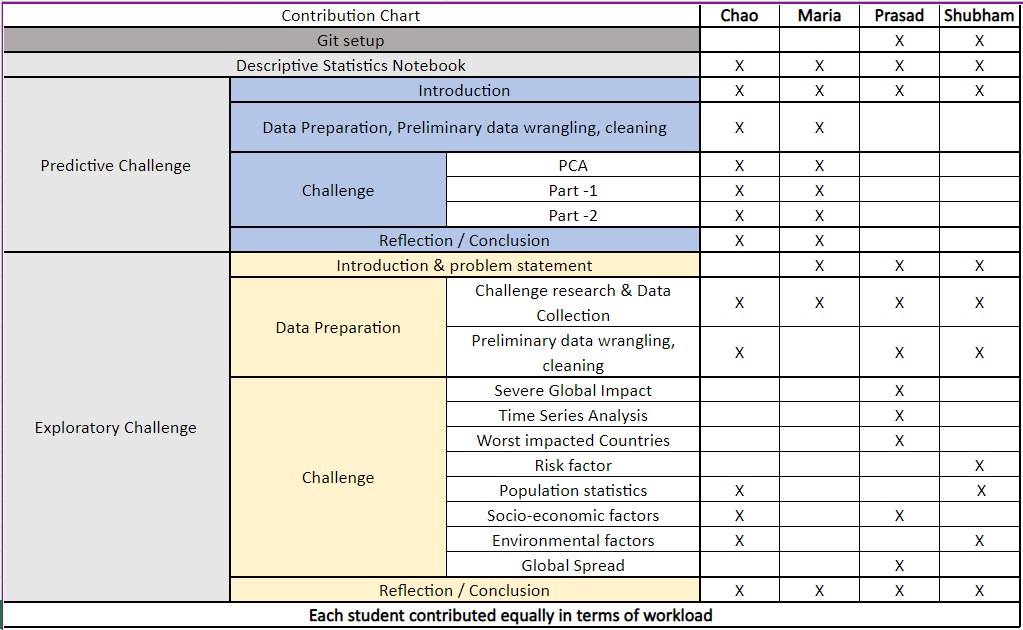